In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

Для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом.

In [0]:
df = pd.read_csv('flight_delays.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


1) Доля всех задержек ко всем вылетам.

In [0]:
delays = df[df['dep_delayed_15min'] == 'Y']
without_delays = df[df['dep_delayed_15min'] == 'N']

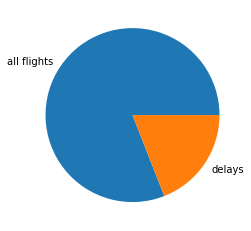

In [0]:
plt.pie(df.groupby('dep_delayed_15min')['dep_delayed_15min'].count(), labels = ['all flights','delays'])
plt.show()

2) Найти зависимость количества задержек от длины пути, который предстоит пролететь самолету.

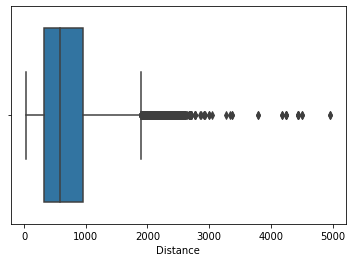

In [0]:
sns.boxplot(x ='Distance', data = delays)


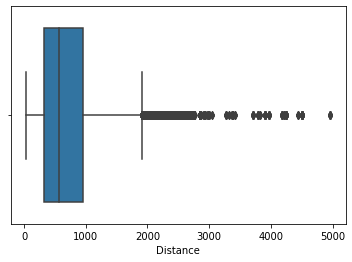

In [0]:
sns.boxplot('Distance', data = without_delays) 

Из анализа box-plot нельзя сказать, что задержка значимо зависит от расстояния полета.

3) Топ 5 направлений, для которых чаще всего происходят задержки

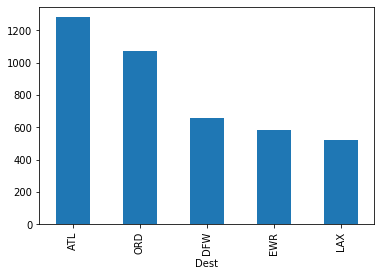

In [0]:
Number_of_delays = delays.groupby('Dest')['dep_delayed_15min'].count()
Top = Number_of_delays.sort_values(ascending=False)
Top.iloc[0:5].plot(kind = 'bar')


4) В какие времена года чаще всего происходят задержки рейсов?

In [0]:
delays.loc[delays['Month'] == 'c-1', 'season'] = 'winter' 
delays.loc[delays['Month'] == 'c-2', 'season'] = 'winter' 
delays.loc[delays['Month'] == 'c-12', 'season'] = 'winter' 
delays.loc[delays['Month'] == 'c-3', 'season'] = 'spring'
delays.loc[delays['Month'] == 'c-4', 'season'] = 'spring'
delays.loc[delays['Month'] == 'c-5', 'season'] = 'spring'
delays.loc[delays['Month'] == 'c-6', 'season'] = 'summer'
delays.loc[delays['Month'] == 'c-7', 'season'] = 'summer'
delays.loc[delays['Month'] == 'c-8', 'season'] = 'summer' 
delays.loc[delays['Month'] == 'c-9', 'season'] = 'autumn'
delays.loc[delays['Month'] == 'c-10', 'season'] = 'autumn'
delays.loc[delays['Month'] == 'c-11', 'season'] = 'autumn'

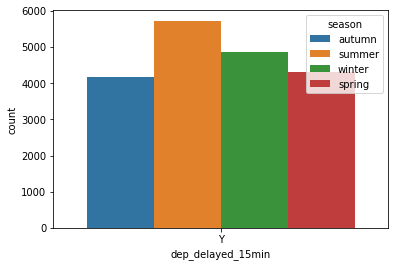

In [0]:
sns.countplot(x='dep_delayed_15min', hue='season', data=delays)

4) Hайти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы.

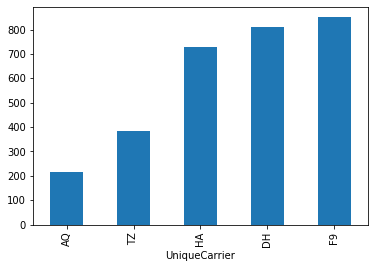

In [0]:
Best_companies = without_delays.groupby('UniqueCarrier')['dep_delayed_15min'].count()
Top_companies = Best_companies.sort_values(ascending=True)
Top_companies.iloc[0:5].plot(kind = 'bar')

5) Найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки.

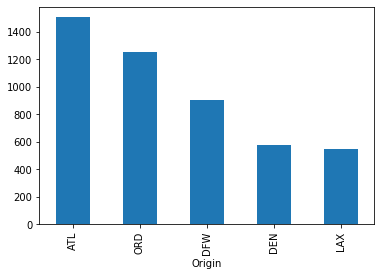

In [0]:
Worst_airports = delays.groupby('Origin')['dep_delayed_15min'].count()
Top_worst = Worst_airports.sort_values(ascending=False)
Top_worst.iloc[0:5].plot(kind = 'bar')

6) Hайти необычную зависимость количества задержек от имеющихся данных.

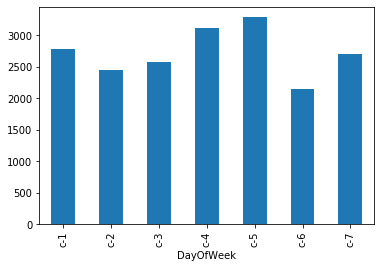

In [0]:
Dependence1 = delays.groupby('DayOfWeek')['dep_delayed_15min'].count()
Dependence.plot(kind = 'bar')

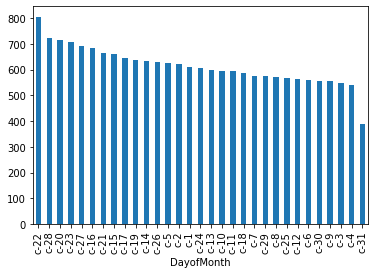

In [0]:
Dependence2 = delays.groupby('DayofMonth')['dep_delayed_15min'].count()
Worst_days = Dependence2.sort_values(ascending=False)
Worst_days.plot(kind = 'bar')

In [0]:
Fr13 = delays[(delays['DayOfWeek'] == 'c-5') & (delays['DayofMonth'] == 'c-13')]['dep_delayed_15min'].count() # кол-во задержек в пятницу 13ого
Fr = delays[(delays['DayOfWeek'] == 'c-5')]['dep_delayed_15min'].count() / 31 # среднее кол-во задержек в любую пятницу
Any13 = delays[(delays['DayofMonth'] == 'c-13')]['dep_delayed_15min'].count() / 7 # среднее кол-во задержек 13-ого числа
Arr = [Fr13, Fr, Any13]
Arr

[90, 105.96774193548387, 85.71428571428571]

Зависимость кол-ва задержек от всего кроме конкретной даты были исследованы в предыдущих пунктах по требованию лабы. Значит осталось проверить зависимость от дня недели и числа. Но никаких "необычных" результатов обнаружено не было. Даже пятница 13ого ничем особо не выделилась. Возможны какие-то более сложные зависимости. 